Problem Statement

In this assignment students have to make ARIMA model over shampoo sales data and
check the MSE between predicted and actual value.
Student can download data in .csv format from the following link:
https://datamarket.com/data/set/22r0/sales-of-shampoo-over-a-three-year-period#!ds=22r0&display=line

In [50]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [69]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')


In [70]:
series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0,squeeze=True, date_parser=parser)
series.head()

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales of shampoo over a three year period, dtype: float64

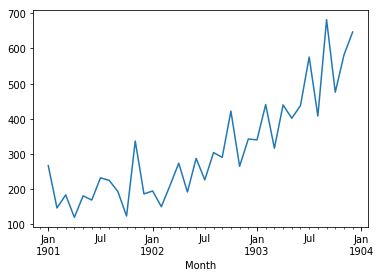

In [71]:
series.plot()
pyplot.show()

Here we see that time series is not stationary and will require differencing to make it stationary.

In [72]:
x = series.values
x

array([266. , 145.9, 183.1, 119.3, 180.3, 168.5, 231.8, 224.5, 192.8,
       122.9, 336.5, 185.9, 194.3, 149.5, 210.1, 273.3, 191.4, 287. ,
       226. , 303.6, 289.9, 421.6, 264.5, 342.3, 339.7, 440.4, 315.9,
       439.3, 401.3, 437.4, 575.5, 407.6, 682. , 475.3, 581.3, 646.9])

In [73]:
size = int(len(x) * 0.60)
print(len(x))
print(size)

36
21


In [74]:
train, test = x[0:size], x[size:len(x)]


In [75]:
history = [X for X in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=272.964506, expected=421.600000
predicted=290.313841, expected=264.500000
predicted=349.117689, expected=342.300000
predicted=306.513018, expected=339.700000
predicted=387.376403, expected=440.400000
predicted=348.154217, expected=315.900000
predicted=386.308823, expected=439.300000
predicted=356.081987, expected=401.300000
predicted=446.379468, expected=437.400000
predicted=394.737277, expected=575.500000
predicted=434.915479, expected=407.600000
predicted=507.923419, expected=682.000000
predicted=435.483044, expected=475.300000
predicted=652.743834, expected=581.300000
predicted=546.343458, expected=646.900000
Test MSE: 7547.807


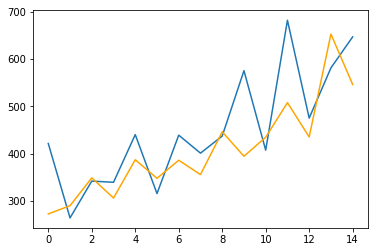

In [77]:
pyplot.plot(test)
pyplot.plot(predictions, color='orange')
pyplot.show()